In [ ]:
#importing all the libraries
import os
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.callbacks import EarlyStopping

In [3]:
#train dir contains the training images
base_dir = '.'
data_dir = os.path.join(base_dir,'train')
files = os.listdir(data_dir)

In [4]:
#target information from labels.csv

labels = pd.read_csv(os.path.join(base_dir,'labels.csv'))
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
file_df = pd.DataFrame({'id':list(map(lambda x:x.replace('.jpg',''),files))})
file_df.head()

,id
0,000bec180eb18c7604dcecc8fe0dba07
1,001513dfcb2ffafc82cccf4d8bbaba97
2,001cdf01b096e06d78e9e5112d419397
3,00214f311d5d2247d5dfe4fe24b2303d
4,0021f9ceb3235effd7fcde7f7538ed62


In [6]:
#mapping file with breed, maintain file read order

label_info =  pd.merge(left = file_df, right = labels)
label_info.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
img = plt.imread(os.path.join(data_dir,files[1]))

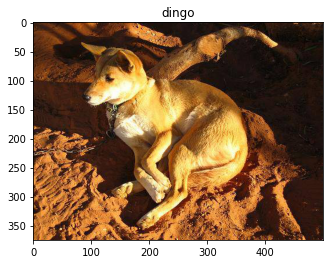

In [8]:
#showing a image

plt.imshow(img)
plt.title(label_info.iloc[1]['breed'])
plt.show()

In [9]:
# converting target to one hot vector format

num_classes = len(label_info.breed.unique())
num_classes

120

In [10]:
le = LabelEncoder()
breed = le.fit_transform(label_info.breed)
Y = np_utils.to_categorical(breed,num_classes = num_classes)

In [11]:
Y.shape

(10222, 120)

In [12]:
# converting image to numpy array
input_dim = (224, 224)

X = np.zeros((Y.shape[0], *input_dim,3))

for i,img in enumerate(files):
    image = load_img(os.path.join(data_dir,img), target_size = input_dim)
    image = img_to_array(image)
    image = image.reshape((1, *image.shape))
    image = preprocess_input(image)
    X[i] = image

In [13]:
X.shape

(10222, 224, 224, 3)

In [14]:
#create callbacks
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [15]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D, Flatten, Dropout

vgg_model = VGG19(weights = 'imagenet', include_top=False)

x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.2)(x)
out = Dense(120, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=out)

for layer in vgg_model.layers:
    layer.trainable = False
    
from keras.optimizers import Adam
opt = Adam()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [4]:
history_last_layer = model.fit(X,Y,batch_size=256,epochs=20,validation_split=0.2,verbose=2,callbacks=[earlystop])
model.save('modellastlayer.h5')

NameError: name 'model' is not defined

In [3]:
history_last_layer.history.keys()

NameError: name 'history_last_layer' is not defined

In [ ]:
val_acc = history_last_layer.history.get('val_acc')

In [ ]:
acc=history_last_layer.history.get('acc')

In [ ]:
overfit_info = pd.DataFrame({'acc':acc, 'val_acc':val_acc})

In [ ]:
overfit_info.plot.line()

In [ ]:
#apart from last layer training one more layer

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D, Flatten, Dropout

vgg_model = VGG19(weights='imagenet', include_top=False)

x= vgg_model.output
x= GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
out = Dense(120,activation = 'softmax')(x)

model_few_layers = Model(inputs=vgg_model.input, outputs=out)

for layer in vgg_model.layers[:-1]:
    layer.trainable = False
for layer in vgg_model.layers[-1:]:
    layer.trainabl= True
from keras.optimizers import Adam
opt= Adam()

model_few_layers.compile(optimzer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_few_layers.summary()

In [ ]:
history_few_layer = model_few_layers.fit(X,Y,batch_size=256,epochs=20,validation_split=0.2,verbose=2,callbacks=[earlystop])
model_few_layers.save('modelfewlayer.h5')

In [ ]:
#loading the image
image = load_img('dog.jpg', target_size=input_dim)
image = img_to_array(image)
image = image.reshape((1, *image.shape))
image = preprocess_input(image)

In [ ]:
res=model_few_layers.predict(image)

In [ ]:
s=np.argsort(res)[0][-5:]
s

In [ ]:
array([119, 112, 90, 49, 67])

In [ ]:
le.inverse_transform(s)



In [ ]:
##image agumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
datagen = ImageDataGenerator(
featurewise_center = True,
featurewise_std_normaliation=True.
rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)

In [ ]:
datagen.fix(X)

In [ ]:
model = load_model('modelfewlayer.h5')

In [ ]:
history_aug_images = model.fit_generator(datagen.flow(X,Y, batch_size=256), steps_per_epoch =len(X), epochs=20, verbose=2)

In [ ]:
history_aug_images.history.keys()

In [ ]:
dict_keys(['loss','acc'])

In [ ]:
model.save('img_aug.h5')

In [ ]:
model = load_model('img_aug.h5')
image = load_img('dog.jpg', target_size=input_dim)
image = img_to_array(image)
image = image.reshape((1, *image.shape))
image = preprocess_input(image)

In [ ]:
re= model.predict(image)

In [ ]:
s=np.argsort(res)[0][-5:]
s

In [ ]:
le.inverse_transform(s)

#further might need to train it more to get the correct name